In [6]:
import pandas as pd

# Load CVs
df_cv = pd.read_csv("/Users/zahra/Desktop/CoverLetterGenerator/data/CV_Extracted.csv")

# Load Job Descriptions
df_job = pd.read_csv("/Users/zahra/Desktop/CoverLetterGenerator/data/JobDescription.csv")

print("CVs Loaded:", len(df_cv))
print("Jobs Loaded:", len(df_job))

# Example: inspect first CV and Job
print(df_cv.head())
print(df_job.head())


CVs Loaded: 1636
Jobs Loaded: 2277
              Name                      Email  \
0  Gregory Bennett  gregory.bennett@gmail.com   
1  Gregory Bennett  gregory.bennett@gmail.com   
2     Jasmine Bell     jasmine.bell@gmail.com   
3    Linda Johnson    linda.johnson@gmail.com   
4        Ryan Cook        ryan.cook@gmail.com   

                                              Skills  
0  optimize,blockchain,transaction,throughput,40,...  
1  blockchain,technology,web3,javascript,python,g...  
2  blockchain,technology,web3,javascript,python,g...  
3  distribute,system,cryptography,smart,contract,...  
4  distribute,system,cryptography,smart,contract,...  
   Unnamed: 0             Job Title  \
0           0     flutter,developer   
1           1      django,developer   
2           2      machine,learning   
3           3          io,developer   
4           4  full,stack,developer   

                                     Job Description  
0  looking,hire,expert,flutter,developer,eligible.

In [7]:
# Check first rows
print(df_cv.head())
print(df_job.head())

# Basic info
print(df_cv.info())
print(df_job.info())

# Check for missing values
print(df_cv.isnull().sum())
print(df_job.isnull().sum())

# Summary statistics
print(df_cv.describe(include='all'))
print(df_job.describe(include='all'))


              Name                      Email  \
0  Gregory Bennett  gregory.bennett@gmail.com   
1  Gregory Bennett  gregory.bennett@gmail.com   
2     Jasmine Bell     jasmine.bell@gmail.com   
3    Linda Johnson    linda.johnson@gmail.com   
4        Ryan Cook        ryan.cook@gmail.com   

                                              Skills  
0  optimize,blockchain,transaction,throughput,40,...  
1  blockchain,technology,web3,javascript,python,g...  
2  blockchain,technology,web3,javascript,python,g...  
3  distribute,system,cryptography,smart,contract,...  
4  distribute,system,cryptography,smart,contract,...  
   Unnamed: 0             Job Title  \
0           0     flutter,developer   
1           1      django,developer   
2           2      machine,learning   
3           3          io,developer   
4           4  full,stack,developer   

                                     Job Description  
0  looking,hire,expert,flutter,developer,eligible...  
1  python,django,developer,lea

In [8]:
# How many unique candidates?
print("Unique candidates:", df_cv['Name'].nunique())

# Count how many skills each CV has
df_cv['num_skills'] = df_cv['Skills'].apply(lambda x: len(str(x).split(',')))
print(df_cv[['Name', 'num_skills']].head())

# Most common skills
from collections import Counter

all_skills = ','.join(df_cv['Skills'].dropna()).split(',')
all_skills = [s.strip().lower() for s in all_skills]
skill_counts = Counter(all_skills)
print(skill_counts.most_common(20))


Unique candidates: 330
              Name  num_skills
0  Gregory Bennett          15
1  Gregory Bennett          16
2     Jasmine Bell          16
3    Linda Johnson          18
4        Ryan Cook          29
[('management', 476), ('work', 452), ('team', 415), ('data', 403), ('test', 378), ('development', 362), ('system', 333), ('tool', 320), ('python', 299), ('program', 280), ('history', 276), ('sql', 274), ('service', 268), ('process', 264), ('use', 263), ('problem', 258), ('design', 254), ('software', 253), ('plan', 240), ('project', 229)]


In [9]:
# Length of job descriptions
df_job['desc_length'] = df_job['Job Description'].apply(lambda x: len(str(x).split(',')))
print(df_job[['Job Title', 'desc_length']])

# Most common words in job descriptions
all_job_words = ','.join(df_job['Job Description'].dropna()).split(',')
all_job_words = [w.strip().lower() for w in all_job_words]
job_word_counts = Counter(all_job_words)
print(job_word_counts.most_common(30))


                  Job Title  desc_length
0         flutter,developer           56
1          django,developer           56
2          machine,learning          169
3              io,developer          135
4      full,stack,developer          405
...                     ...          ...
2272      backend,developer          258
2273   full,stack,developer          337
2274  network,administrator           50
2275       machine,learning          170
2276   full,stack,developer          119

[2277 rows x 2 columns]
[('experience', 9810), ('work', 4903), ('year', 4653), ('development', 4191), ('team', 3750), ('application', 3542), ('skill', 3324), ('knowledge', 3226), ('design', 3086), ('software', 2981), ('technology', 2769), ('data', 2752), ('job', 2714), ('system', 2591), ('preferred', 2473), ('service', 2286), ('required', 2149), ('understanding', 2092), ('developer', 2055), ('working', 2008), ('time', 1979), ('web', 1960), ('database', 1866), ('strong', 1864), ('solution', 1820), ('cod

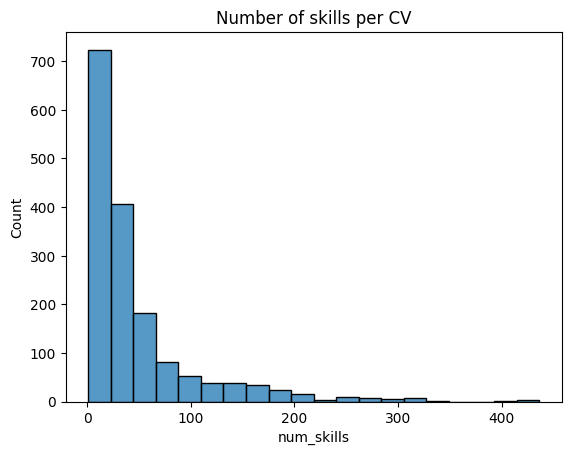

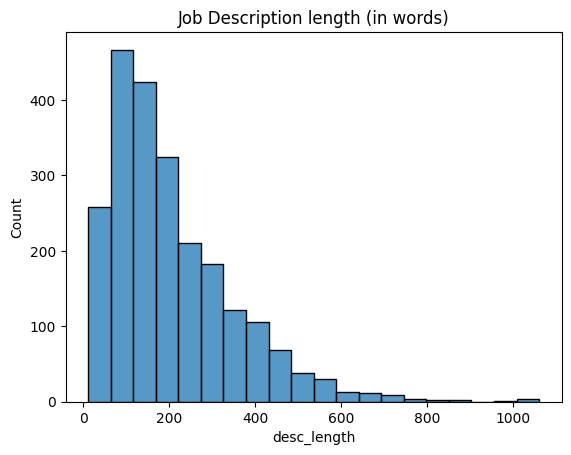

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of number of skills per CV
sns.histplot(df_cv['num_skills'], bins=20)
plt.title("Number of skills per CV")
plt.show()

# Histogram of job description lengths
sns.histplot(df_job['desc_length'], bins=20)
plt.title("Job Description length (in words)")
plt.show()
